# Relationship between public debt and GDP growth 


Resource-intensive and non-resource-intensive Sub-Saharan African countries

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introduction to data project

Write about what we want to to

# Read and clean data

We have two datasets... Write about datasets. Write that we want to only look at the resource parameters. 

In [49]:
#We import the GDPData and DebtData and inspect the data
GDPData = pd.read_csv('GDPGrowthData-All.csv', delimiter=';')
DebtData = pd.read_csv('DebtData-All.csv', delimiter=';')
display(GDPData)
display(DebtData)


,Real Per Capita GDP Growth (Annual percent change),2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angola,"7,13002378","11,0085151","7,611984132","9,9352311","7,159206471","-2,798670973","1,015170454","-0,345131558","4,538092554",...,"-2,642971423","-6,011877291","-3,633445779","-4,676609243","-4,017052156","-8,672491127","-1,954664333","-0,438960711","-1,694201086","0,266323328"
2,Benin,"1,316505223","-1,467824074","0,811426917","2,982034825","1,849634571","-0,648430263","-0,839369886","-0,007422704","1,800063786",...,"-1,181677804","0,335852248","2,603556528","3,624262544","3,824506878","0,951937862","4,129264432","3,319872865","2,587637195","3,398716724"
3,Botswana,"-0,360239488","3,102066272","4,060814622","3,734067816","1,176918798","-15,89055765","7,875871145","4,717165868","-2,070174149",...,"-6,699965248","5,048819767","1,970663783","2,083051442","1,042060184","-10,40033003","10,05052587","4,098347015","2,092020193","2,412381096"
4,Burkina Faso,"1,250803723","5,293432973","2,986692134","1,001302626","2,731085635","-0,01247427","5,305144555","3,502706594","3,273591496",...,"0,877785605","2,893498327","3,203256836","3,692238467","2,869545172","-0,852021147","3,985314091","-1,290475581","1,520630401","3,542102401"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,SSA excluding Nigeria and South Africa,"3,447278261","3,571687695","2,839090371","3,885951663","3,184049438","0,788599844","3,19731919","3,058760784","3,165871901",...,"1,469502252","0,68727074","1,941754006","1,875342535","2,014401423","-2,581545887","2,64120069","2,423211085","1,842827162","2,548018914"
66,Sub-Saharan Africa,"4,47179197","3,880782451","3,526908206","4,072343542","3,107110311","1,090903492","4,198545091","2,44582409","2,186454234",...,"0,702514019","-0,922622032","0,502777856","0,856381803","0,777393288","-3,90083797","2,464749774","1,755495001","1,032155308","1,656233947"
67,WAEMU,"-0,552620393","0,682185752","0,275486063","0,043162155","1,185399335","0,302606449","1,247637955","-2,130503843","3,769496099",...,"3,330821662","3,15291599","3,460161784","2,656211281","2,908182666","-1,082502745","3,08288132","2,736691324","2,304269019","4,039794575"
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Government Debt (% of GDP) (Percent of GDP),2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angola,"47,7170673","33,46404183","18,72879033","21,04349445","31,37823243","56,30224695","37,16284025","29,55771502","26,69055968",...,"57,09304822","75,66263732","69,32286758","92,99500121","113,5541748","138,8971593","86,77879757","66,6534474","84,87329064","77,14199735"
2,Benin,"21,50953025","26,97813898","8,366122298","14,28590371","18,30665552","18,7476805","20,99976509","21,86041054","19,54020639",...,"30,90022983","35,92334976","39,59846316","41,0803507","41,22964235","46,14207668","50,28803642","54,18687209","52,97705253","52,44742843"
3,Botswana,"10,74931391","7,459901827","6,135958418","5,930960344","7,794886893","18,39752252","20,82638244","20,92600769","19,98355799",...,"18,17732905","16,35551623","14,53073322","14,85554047","16,47194004","18,70313683","18,69318092","17,98009366","18,70106097","18,07958929"
4,Burkina Faso,"40,74047624","39,21402723","20,08884921","22,41608794","24,86787102","25,8712008","23,69432237","24,50360166","25,21060004",...,"31,2510933","32,88655421","33,6879718","38,16197033","41,51335756","43,34650134","55,37344159","58,32044523","61,17738497","61,24797989"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,SSA excluding Nigeria and South Africa,"59,19114699","50,02579462","37,0295056","32,51296825","32,12739715","36,63241138","31,97678936","29,53772619","28,58202375",...,"45,09866397","50,14190336","51,40374153","54,06424848","57,13349049","63,41050369","60,31892765","59,46670973","58,82520743","54,0855452"
66,Sub-Saharan Africa,"43,55839807","36,01044888","27,29937225","23,86112832","23,21493451","26,68630678","25,66877119","27,87136323","27,83422038",...,"37,62672047","42,34811341","44,68203525","47,13693619","49,81961902","57,08652861","56,63627423","57,11154273","57,72204168","55,84471005"
67,WAEMU,"47,65620814","48,99005186","36,06823377","35,39778216","34,74146319","34,93391076","33,60986695","34,17685261","26,05286688",...,"33,5285381","36,66913393","39,87845965","41,8862803","43,87340318","50,40834995","55,57853314","59,30789715","60,06139666","58,60313465"
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that we have some 'NaN' rows we want to get rid of and also the last row that we want to get rid of. 

In [50]:
#Get rid of empty rows
GDPData.dropna(how='all', inplace=True)
DebtData.dropna(how='all', inplace=True)
#Get rid of last row
# Get the index of the last row
last_row_index_GDP = GDPData.index[-1]
last_row_index_Debt = DebtData.index[-1]

# Drop the last row
GDPData.drop(last_row_index_GDP, inplace=True)
DebtData.drop(last_row_index_Debt, inplace=True)

display(GDPData)
display(DebtData)

,Real Per Capita GDP Growth (Annual percent change),2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Angola,"7,13002378","11,0085151","7,611984132","9,9352311","7,159206471","-2,798670973","1,015170454","-0,345131558","4,538092554",...,"-2,642971423","-6,011877291","-3,633445779","-4,676609243","-4,017052156","-8,672491127","-1,954664333","-0,438960711","-1,694201086","0,266323328"
2,Benin,"1,316505223","-1,467824074","0,811426917","2,982034825","1,849634571","-0,648430263","-0,839369886","-0,007422704","1,800063786",...,"-1,181677804","0,335852248","2,603556528","3,624262544","3,824506878","0,951937862","4,129264432","3,319872865","2,587637195","3,398716724"
3,Botswana,"-0,360239488","3,102066272","4,060814622","3,734067816","1,176918798","-15,89055765","7,875871145","4,717165868","-2,070174149",...,"-6,699965248","5,048819767","1,970663783","2,083051442","1,042060184","-10,40033003","10,05052587","4,098347015","2,092020193","2,412381096"
4,Burkina Faso,"1,250803723","5,293432973","2,986692134","1,001302626","2,731085635","-0,01247427","5,305144555","3,502706594","3,273591496",...,"0,877785605","2,893498327","3,203256836","3,692238467","2,869545172","-0,852021147","3,985314091","-1,290475581","1,520630401","3,542102401"
5,Burundi,"0,743909609","3,894884711","2,343502082","0,438788825","1,511822841","0,496366831","1,864499325","0,904561102","1,30621554",...,"-6,699029126","-3,682188998","-2,616273126","-1,349595931","-1,123815647","-2,58728668","0,11582752","-1,139027758","0,326282418","2,864291017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,SACU,"3,312286951","4,006795954","4,270289058","3,952898993","1,68223057","-3,332420117","1,807899378","1,767728683","0,873047595",...,"-0,32778796","-0,598225697","-0,3204375","0,141713431","-1,09008336","-7,422353175","4,032143568","1,329445603","-0,375026401","0,432626288"
64,SADC,"3,533208259","4,397780193","4,123110456","4,732275007","2,517471107","-2,035991739","2,41748589","2,093085052","2,094442191",...,"-0,004705216","-0,867925616","-0,12219354","0,124224185","-0,803187898","-6,190302847","2,698348313","1,588481855","0,359179872","0,99773713"
65,SSA excluding Nigeria and South Africa,"3,447278261","3,571687695","2,839090371","3,885951663","3,184049438","0,788599844","3,19731919","3,058760784","3,165871901",...,"1,469502252","0,68727074","1,941754006","1,875342535","2,014401423","-2,581545887","2,64120069","2,423211085","1,842827162","2,548018914"
66,Sub-Saharan Africa,"4,47179197","3,880782451","3,526908206","4,072343542","3,107110311","1,090903492","4,198545091","2,44582409","2,186454234",...,"0,702514019","-0,922622032","0,502777856","0,856381803","0,777393288","-3,90083797","2,464749774","1,755495001","1,032155308","1,656233947"


,Government Debt (% of GDP) (Percent of GDP),2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Angola,"47,7170673","33,46404183","18,72879033","21,04349445","31,37823243","56,30224695","37,16284025","29,55771502","26,69055968",...,"57,09304822","75,66263732","69,32286758","92,99500121","113,5541748","138,8971593","86,77879757","66,6534474","84,87329064","77,14199735"
2,Benin,"21,50953025","26,97813898","8,366122298","14,28590371","18,30665552","18,7476805","20,99976509","21,86041054","19,54020639",...,"30,90022983","35,92334976","39,59846316","41,0803507","41,22964235","46,14207668","50,28803642","54,18687209","52,97705253","52,44742843"
3,Botswana,"10,74931391","7,459901827","6,135958418","5,930960344","7,794886893","18,39752252","20,82638244","20,92600769","19,98355799",...,"18,17732905","16,35551623","14,53073322","14,85554047","16,47194004","18,70313683","18,69318092","17,98009366","18,70106097","18,07958929"
4,Burkina Faso,"40,74047624","39,21402723","20,08884921","22,41608794","24,86787102","25,8712008","23,69432237","24,50360166","25,21060004",...,"31,2510933","32,88655421","33,6879718","38,16197033","41,51335756","43,34650134","55,37344159","58,32044523","61,17738497","61,24797989"
5,Burundi,"172,738336","136,9801189","130,2548505","129,6132456","102,5152332","25,69016304","46,91165325","42,70570963","41,43049155",...,"39,92597971","46,11901291","46,90232945","52,970966","59,98754138","65,96489731","66,56368012","68,35170849","72,72925215","65,83576038"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,SACU,"30,00314469","28,76566031","27,26434318","23,7011482","23,42558957","26,35046333","30,36095168","33,94190111","36,30864263",...,"43,85878564","45,51390601","46,86073339","49,83345089","54,41854854","66,32146644","66,42974134","68,27811964","70,3679594","72,20430836"
64,SADC,"39,48884288","35,49691024","29,95439831","26,3740497","28,29755337","33,82976426","31,48838981","32,59410765","33,60363395",...,"46,11780188","50,49883511","51,11407854","54,69288862","60,54489493","70,28745206","64,14032188","64,2644141","66,79551569","64,45517676"
65,SSA excluding Nigeria and South Africa,"59,19114699","50,02579462","37,0295056","32,51296825","32,12739715","36,63241138","31,97678936","29,53772619","28,58202375",...,"45,09866397","50,14190336","51,40374153","54,06424848","57,13349049","63,41050369","60,31892765","59,46670973","58,82520743","54,0855452"
66,Sub-Saharan Africa,"43,55839807","36,01044888","27,29937225","23,86112832","23,21493451","26,68630678","25,66877119","27,87136323","27,83422038",...,"37,62672047","42,34811341","44,68203525","47,13693619","49,81961902","57,08652861","56,63627423","57,11154273","57,72204168","55,84471005"


We want to make this into panel data in the so called 'long format' for the merge of the datasets later. 

In [53]:
# Transform the data into a long format
GDP_panel_data = GDPData.melt(id_vars=['Real Per Capita GDP Growth (Annual percent change)'], 
                       var_name="Year", 
                       value_name="GDP Growth Rate")
Debt_panel_data = DebtData.melt(id_vars=['Government Debt (% of GDP) (Percent of GDP)'], 
                       var_name="Year", 
                       value_name="Government debt (Percent of GDP)")

# Defining the columns
GDP_panel_data.columns = ["Country name", "Year", "Real per capita GDP growth rate"]
Debt_panel_data.columns = ["Country name", "Year", "Government debt (Percent of GDP)"]

# Convert 'Year' to integer for proper sorting
GDP_panel_data['Year'] = GDP_panel_data['Year'].astype(int)
Debt_panel_data['Year'] = Debt_panel_data['Year'].astype(int)

# Sort the data by country and year
GDP_panel_data = GDP_panel_data.sort_values(by=["Country name", "Year"])
Debt_panel_data = Debt_panel_data.sort_values(by=["Country name", "Year"])
GDP_panel_data.to_csv('Panel_data_print_GDP', index=False)

print(GDP_panel_data)



     Country name  Year Real per capita GDP growth rate
0          Angola  2004                      7,13002378
67         Angola  2005                      11,0085151
134        Angola  2006                     7,611984132
201        Angola  2007                       9,9352311
268        Angola  2008                     7,159206471
...           ...   ...                             ...
1116     Zimbabwe  2020                    -9,505027888
1183     Zimbabwe  2021                     6,306549466
1250     Zimbabwe  2022                     4,045850717
1317     Zimbabwe  2023                     1,900288606
1384     Zimbabwe  2024                     1,615923398

[1407 rows x 3 columns]


Now we want to merge the data

In [67]:
#Make an inner merge
merged_data = pd.merge(GDP_panel_data, Debt_panel_data, on=['Country name', 'Year'])
merged_data.to_csv('Merged_data_print', index=False)
display(merged_data)


,Country name,Year,Real per capita GDP growth rate,Government debt (Percent of GDP)
0,Angola,2004,"7,13002378","47,7170673"
1,Angola,2005,"11,0085151","33,46404183"
2,Angola,2006,"7,611984132","18,72879033"
3,Angola,2007,"9,9352311","21,04349445"
4,Angola,2008,"7,159206471","31,37823243"
...,...,...,...,...
1402,Zimbabwe,2020,"-9,505027888","84,36544583"
1403,Zimbabwe,2021,"6,306549466","59,76893832"
1404,Zimbabwe,2022,"4,045850717","98,44937687"
1405,Zimbabwe,2023,"1,900288606","95,4346161"


To explore the data we make an interactive plot

In [69]:
#Plot
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(,u_vec)

ax.set_title('Value of choice, $u(x_1,1)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,1)$');
# Dropdown widget for country selection
#countries = merged_data['Country name'].unique()
#dropdown = widgets.Dropdown(
    #options=countries,
    #value=countries[0],
    #description='Country:',
    #disabled=False,


# Interact function to update the plot based on the dropdown
#widgets.interact(plot_data, country=dropdown)


TypeError: no numeric data to plot

Now we want to use a subset of the dataset where we look at averages for resource-intensive countries, non-resource-intensive countries and the total average which is 'Sub-Saharan Africa'. So I want to drop all rows but these 3. 

In [59]:
# Defining the countries we want to keep
countries_to_keep = ['Sub-Saharan Africa', 'Resource-intensive countries  ','Non-resource-intensive countires  ']  

# Filter the data for the selected countries
merged_filtered_data = merged_data[merged_data['Country name'].isin(countries_to_keep)]

display(merged_filtered_data)



,Country name,Year,Real per capita GDP growth rate,Government debt (Percent of GDP)
924,Non-resource-intensive countires,2004,"2,353700959","57,55224649"
925,Non-resource-intensive countires,2005,"3,027602537","53,9810867"
926,Non-resource-intensive countires,2006,"3,035270914","42,95891079"
927,Non-resource-intensive countires,2007,"3,587214706","36,27612631"
928,Non-resource-intensive countires,2008,"2,695083183","35,05855509"
...,...,...,...,...
1255,Sub-Saharan Africa,2020,"-3,90083797","57,08652861"
1256,Sub-Saharan Africa,2021,"2,464749774","56,63627423"
1257,Sub-Saharan Africa,2022,"1,755495001","57,11154273"
1258,Sub-Saharan Africa,2023,"1,032155308","57,72204168"


In [ ]:
#Make an inner merge
merged = pd.merge(Elprice_DK1, Consumption_DK1_122, on='HourDK')

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

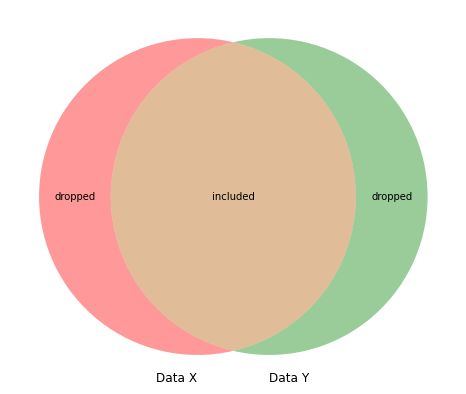

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.